<a href="https://colab.research.google.com/github/joshuabusinge/deeplearning_chestopacity/blob/main/ChestOpacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib
dataset_1 = "/content/drive/MyDrive/MASTERS DEGREE/Makerere Unversity/SEM 2/Deep Learning/dataset1"
training_ds = tf.keras.utils.image_dataset_from_directory(dataset_1, validation_split=0.2, subset="training", seed=123, image_size=(100, 100), batch_size=20)
# data_dir = pathlib.Path(dataset_1)

Found 715 files belonging to 2 classes.
Using 572 files for training.


In [ ]:
class_names = training_ds.class_names
print(class_names)

['normal', 'sick']


In [ ]:
valid_ds = tf.keras.utils.image_dataset_from_directory(dataset_1, validation_split=0.2, subset="validation", seed=123, image_size=(100, 100), batch_size=20)


Found 715 files belonging to 2 classes.
Using 143 files for validation.


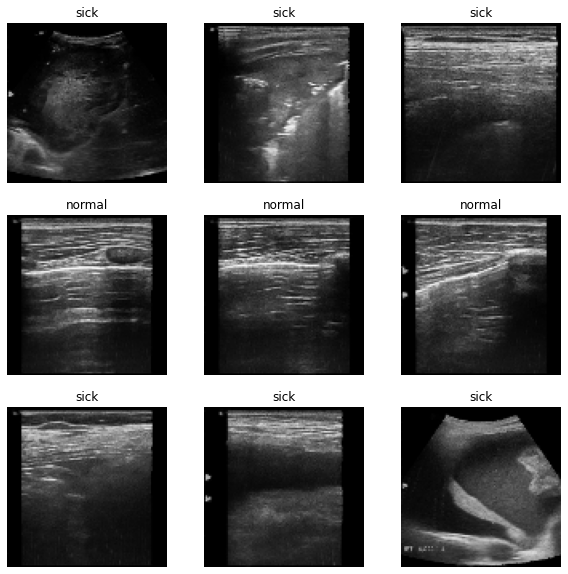

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in training_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 100, 100, 3)
(20,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = training_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[3]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 


0.0 0.9695942


Creating the Model

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(100, 100, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        1

Train the Model

In [ ]:
epochs=10
history = model.fit(
  training_ds,
  validation_data=valid_ds,
  epochs=epochs
)

Epoch 1/10
29/29 [==============================] - 1s 18ms/step - loss: 0.0108 - accuracy: 0.9983 - val_loss: 0.1424 - val_accuracy: 0.9720
Epoch 2/10
29/29 [==============================] - 0s 15ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.1579 - val_accuracy: 0.9580
Epoch 3/10
29/29 [==============================] - 0s 14ms/step - loss: 0.0319 - accuracy: 0.9878 - val_loss: 0.1201 - val_accuracy: 0.9790
Epoch 4/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0391 - accuracy: 0.9860 - val_loss: 0.2232 - val_accuracy: 0.9650
Epoch 5/10
29/29 [==============================] - 0s 9ms/step - loss: 0.0272 - accuracy: 0.9895 - val_loss: 0.1787 - val_accuracy: 0.9650
Epoch 6/10
29/29 [==============================] - 0s 9ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.2342 - val_accuracy: 0.9650
Epoch 7/10
29/29 [==============================] - 0s 9ms/step - loss: 0.0294 - accuracy: 0.9860 - val_loss: 0.1876 - val_accuracy: 0.9790
Epoch 8/10
29/29

Visualize training results

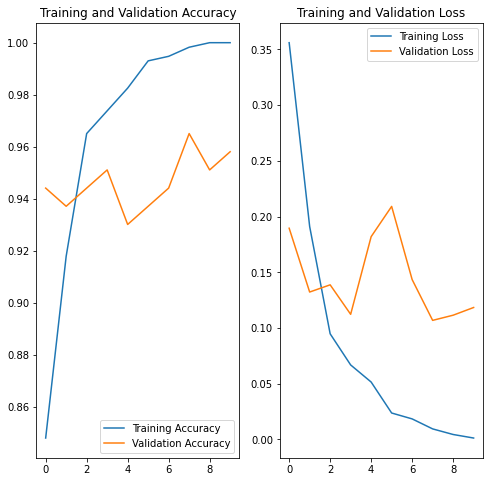

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
valid_loss,valid_acc = model.evaluate(valid_ds)
print(valid_loss)
print(valid_acc)

training_loss,training_acc = model.evaluate(training_ds)
print(training_loss)
print(training_acc)


8/8 [==============================] - 0s 4ms/step - loss: 0.1184 - accuracy: 0.9580
0.11838541179895401
0.9580419659614563
29/29 [==============================] - 0s 4ms/step - loss: 8.8612e-04 - accuracy: 1.0000
0.0008861227543093264
1.0


Data augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(100,
                                  100,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

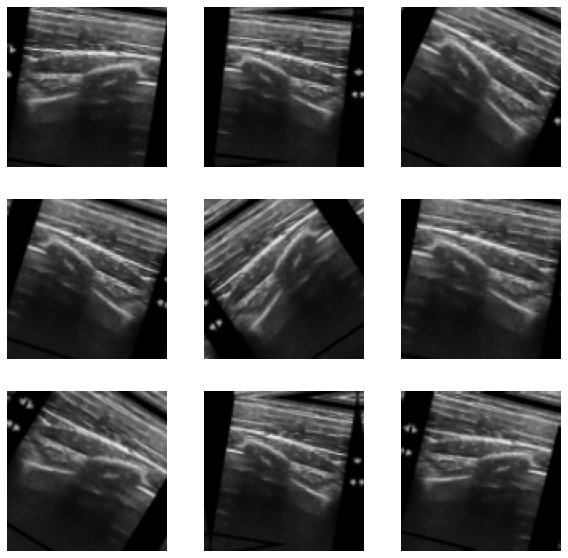

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in training_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Dropout

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                 

In [ ]:
epochs = 15
history = model.fit(
  training_ds,
  validation_data=valid_ds,
  epochs=epochs
)

Epoch 1/15
29/29 [==============================] - 1s 16ms/step - loss: 0.5314 - accuracy: 0.7028 - val_loss: 0.3409 - val_accuracy: 0.8252
Epoch 2/15
29/29 [==============================] - 0s 11ms/step - loss: 0.3464 - accuracy: 0.8392 - val_loss: 0.3120 - val_accuracy: 0.8531
Epoch 3/15
29/29 [==============================] - 0s 11ms/step - loss: 0.3290 - accuracy: 0.8444 - val_loss: 0.1989 - val_accuracy: 0.9021
Epoch 4/15
29/29 [==============================] - 0s 10ms/step - loss: 0.2418 - accuracy: 0.8881 - val_loss: 0.2591 - val_accuracy: 0.9091
Epoch 5/15
29/29 [==============================] - 0s 9ms/step - loss: 0.2141 - accuracy: 0.9091 - val_loss: 0.1361 - val_accuracy: 0.9580
Epoch 6/15
29/29 [==============================] - 0s 9ms/step - loss: 0.2489 - accuracy: 0.9073 - val_loss: 0.2486 - val_accuracy: 0.9091
Epoch 7/15
29/29 [==============================] - 0s 9ms/step - loss: 0.2018 - accuracy: 0.9108 - val_loss: 0.1392 - val_accuracy: 0.9510
Epoch 8/15
29/29

Visualize training results

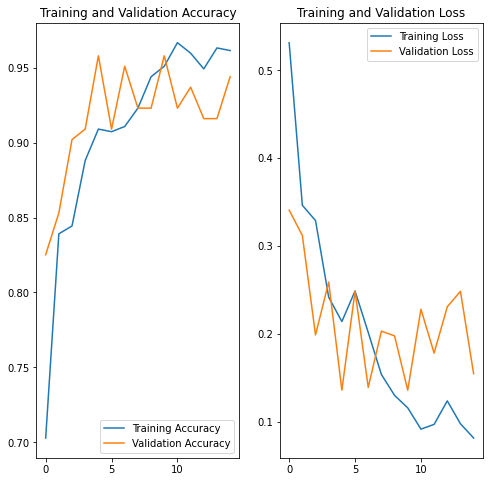

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
valid_loss,valid_acc = model.evaluate(valid_ds)
print(valid_loss)
print(valid_acc)

training_loss,training_acc = model.evaluate(training_ds)
print(training_loss)
print(training_acc)

8/8 [==============================] - 0s 4ms/step - loss: 0.1547 - accuracy: 0.9441
0.1546829789876938
0.9440559148788452
29/29 [==============================] - 0s 4ms/step - loss: 0.0943 - accuracy: 0.9615
0.09431205689907074
0.9615384340286255


Predict on new data

In [ ]:
dataset_1 = "/content/drive/MyDrive/MASTERS DEGREE/Makerere Unversity/SEM 2/Deep Learning/dataset1/normal/normal_0.png"
#test_ds = tf.keras.utils.get_file('sick', origin = dataset_1 )

img = tf.keras.utils.load_img(dataset_1, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to normal with a 100.00 percent confidence.


Found 715 files belonging to 2 classes.
Predictions:
 [0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1]
Labels:
 [0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1]


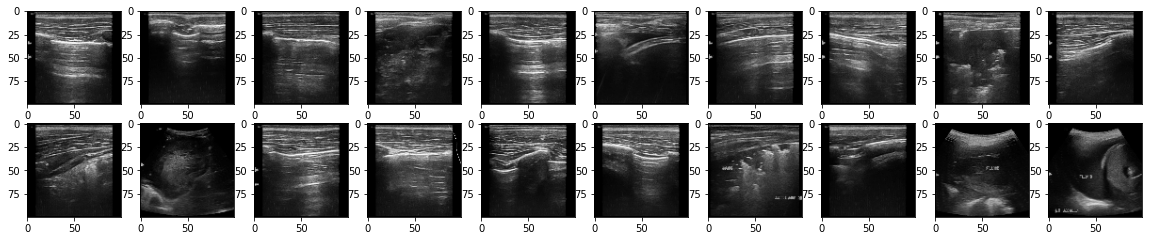

In [ ]:
dataset_1 = "/content/drive/MyDrive/MASTERS DEGREE/Makerere Unversity/SEM 2/Deep Learning/dataset1"
test_ds = tf.keras.utils.image_dataset_from_directory(dataset_1, image_size=(100, 100), batch_size=20)

# Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(20):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  

In [ ]:
test_loss,test_acc = model.evaluate(test_ds)
print(test_loss)
print(test_acc)

36/36 [==============================] - 2s 45ms/step - loss: 0.1032 - accuracy: 0.9469
0.10322060436010361
0.9468531608581543


Predict New Data from DataSet_2

In [ ]:
dataset_2 = "/content/drive/MyDrive/MASTERS DEGREE/Makerere Unversity/SEM 2/Deep Learning/dataset2"
test_ds2 = tf.keras.utils.image_dataset_from_directory(dataset_2, image_size=(100, 100), batch_size=20)

Found 224 files belonging to 1 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

test_ds2 = test_ds2.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds2 = test_ds2.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds2))
first_image = image_batch[3]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.84311295


Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


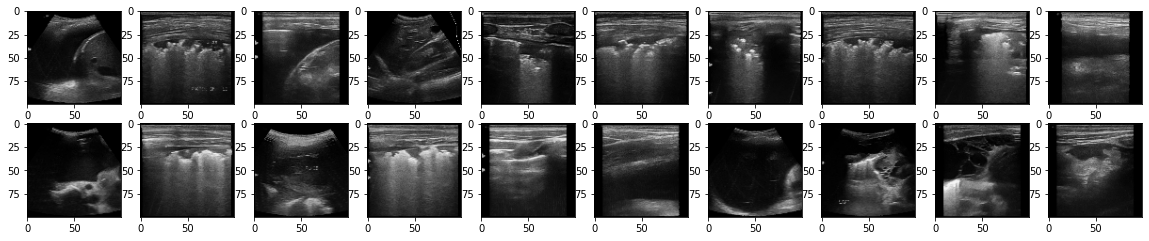

In [ ]:


# Retrieve a batch of images from the test set
image_batch, label_batch = test_ds2.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(20):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))

In [ ]:
test_loss,test_acc = model.evaluate(test_ds2)
print(test_loss)
print(test_acc)

12/12 [==============================] - 0s 4ms/step - loss: 5.7141 - accuracy: 0.1295
5.7140703201293945
0.1294642835855484
